<a href="https://colab.research.google.com/github/araj59197/Dance-Website-using-Html-CSS-Javascript/blob/main/BIG_MARKET_SALE_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [3]:
df = pd.read_csv('Train-Set.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data preprocessing

In [5]:
df.select_dtypes(include='object').nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [4]:
df.drop(columns='Item_Identifier', inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


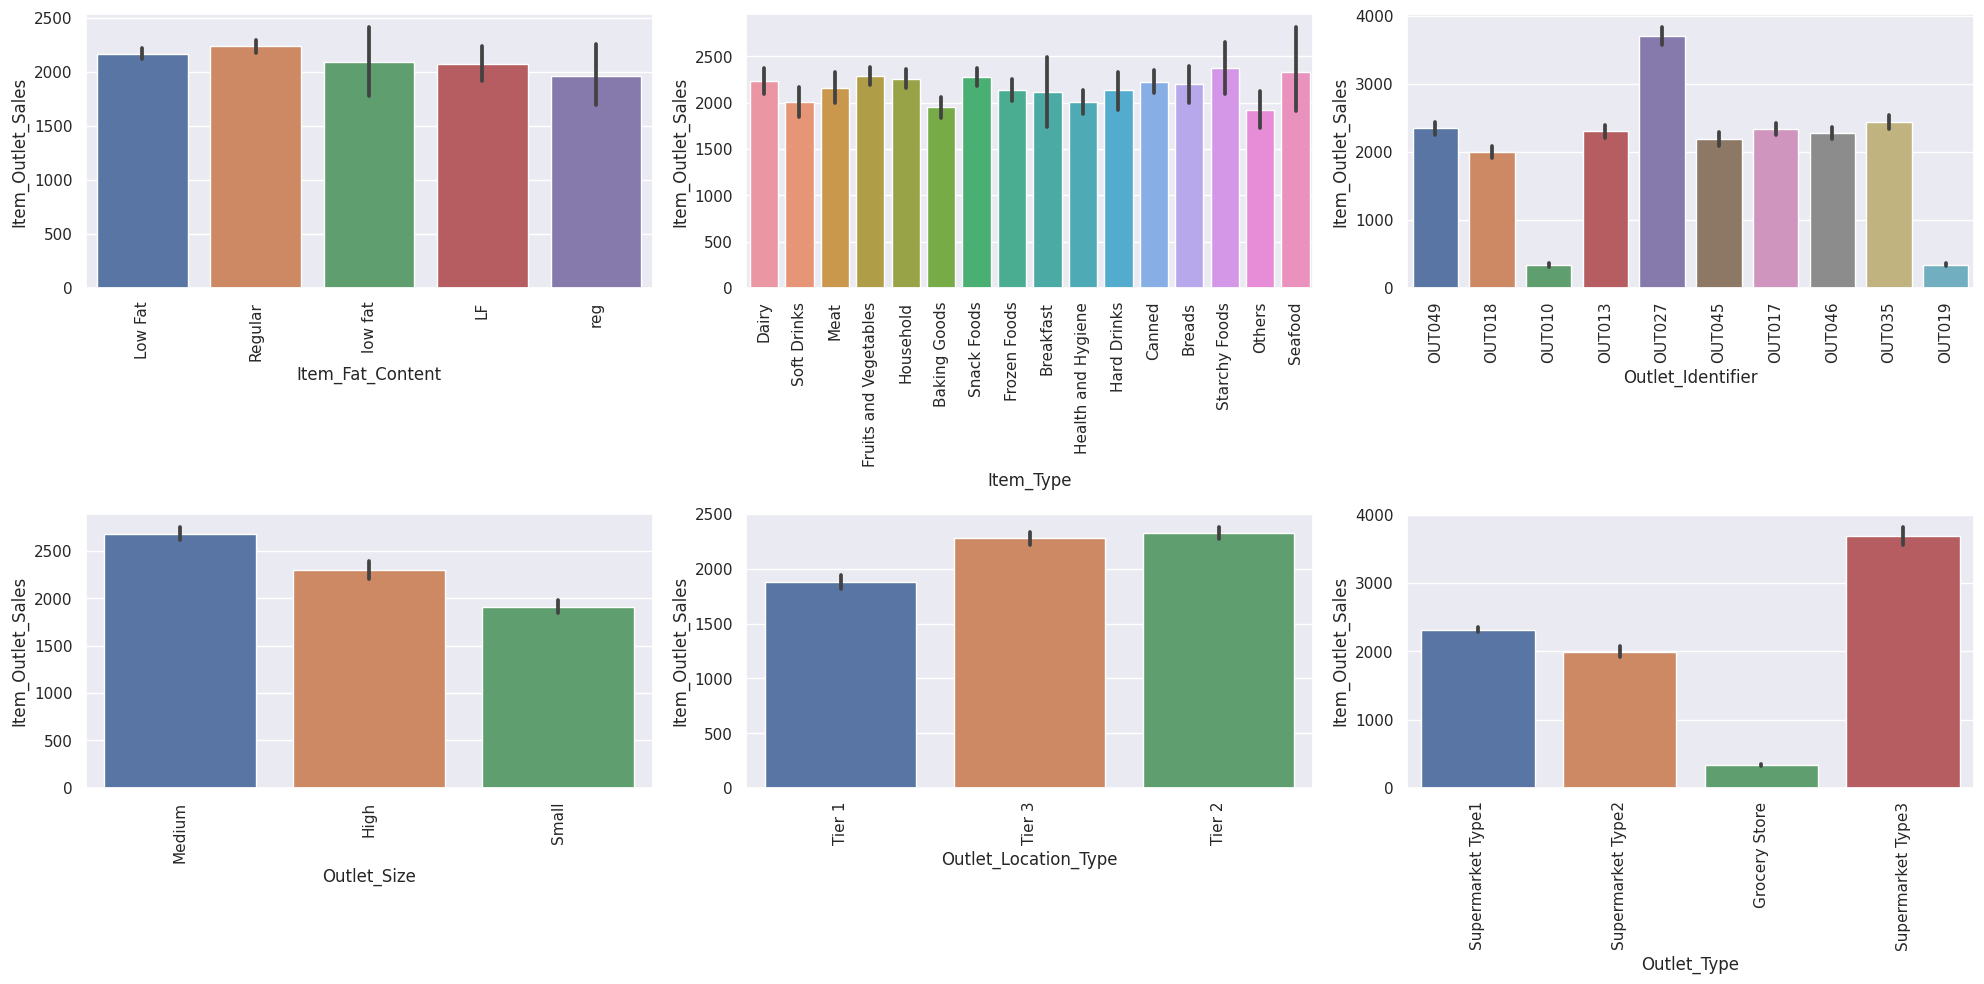

In [6]:
cat_vars=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
fig , axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs=axs.flatten()
for i, var in enumerate(cat_vars):
  sns.barplot(x=var, y='Item_Outlet_Sales', data=df, ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

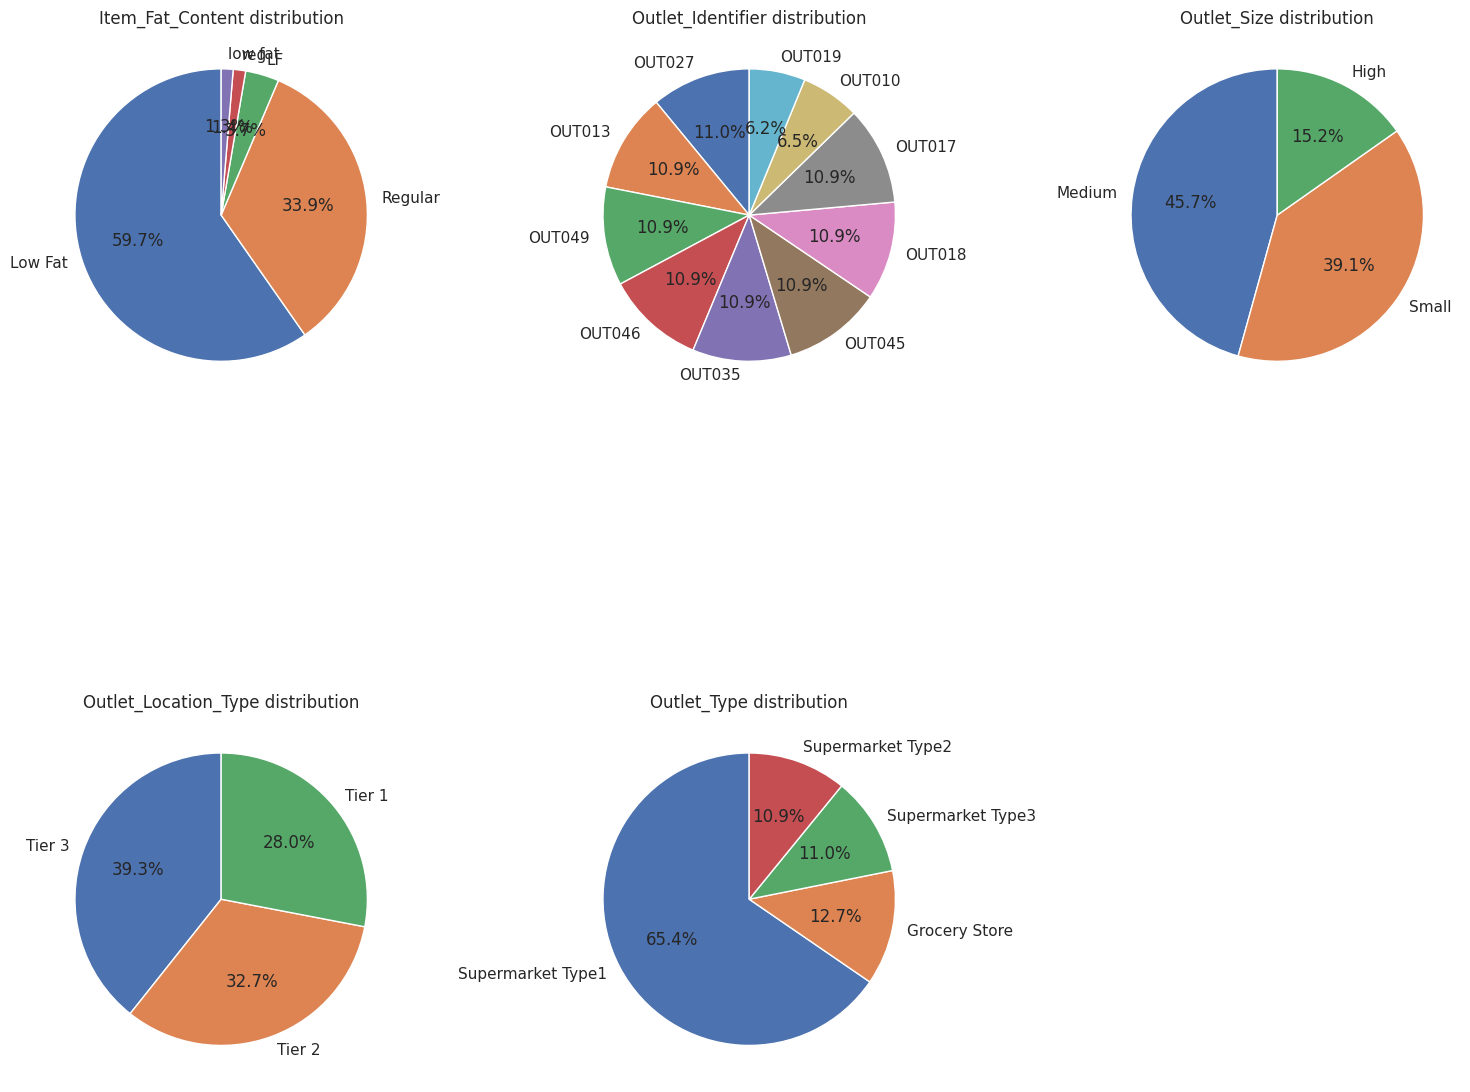

In [7]:
cat_vars=['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# create a figure and axes
fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
  if i < len(axs.flat):
    # count the number of occurence for each category
    cat_counts=df[var].value_counts()
    # create a pie chart
    axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
    # set a title for each subplot
    axs.flat[i].set_title(f'{var} distribution')
    
# adjust spacing between subplot
fig.tight_layout()
fig.delaxes(axs[1][2])

#show the plots
plt.show()

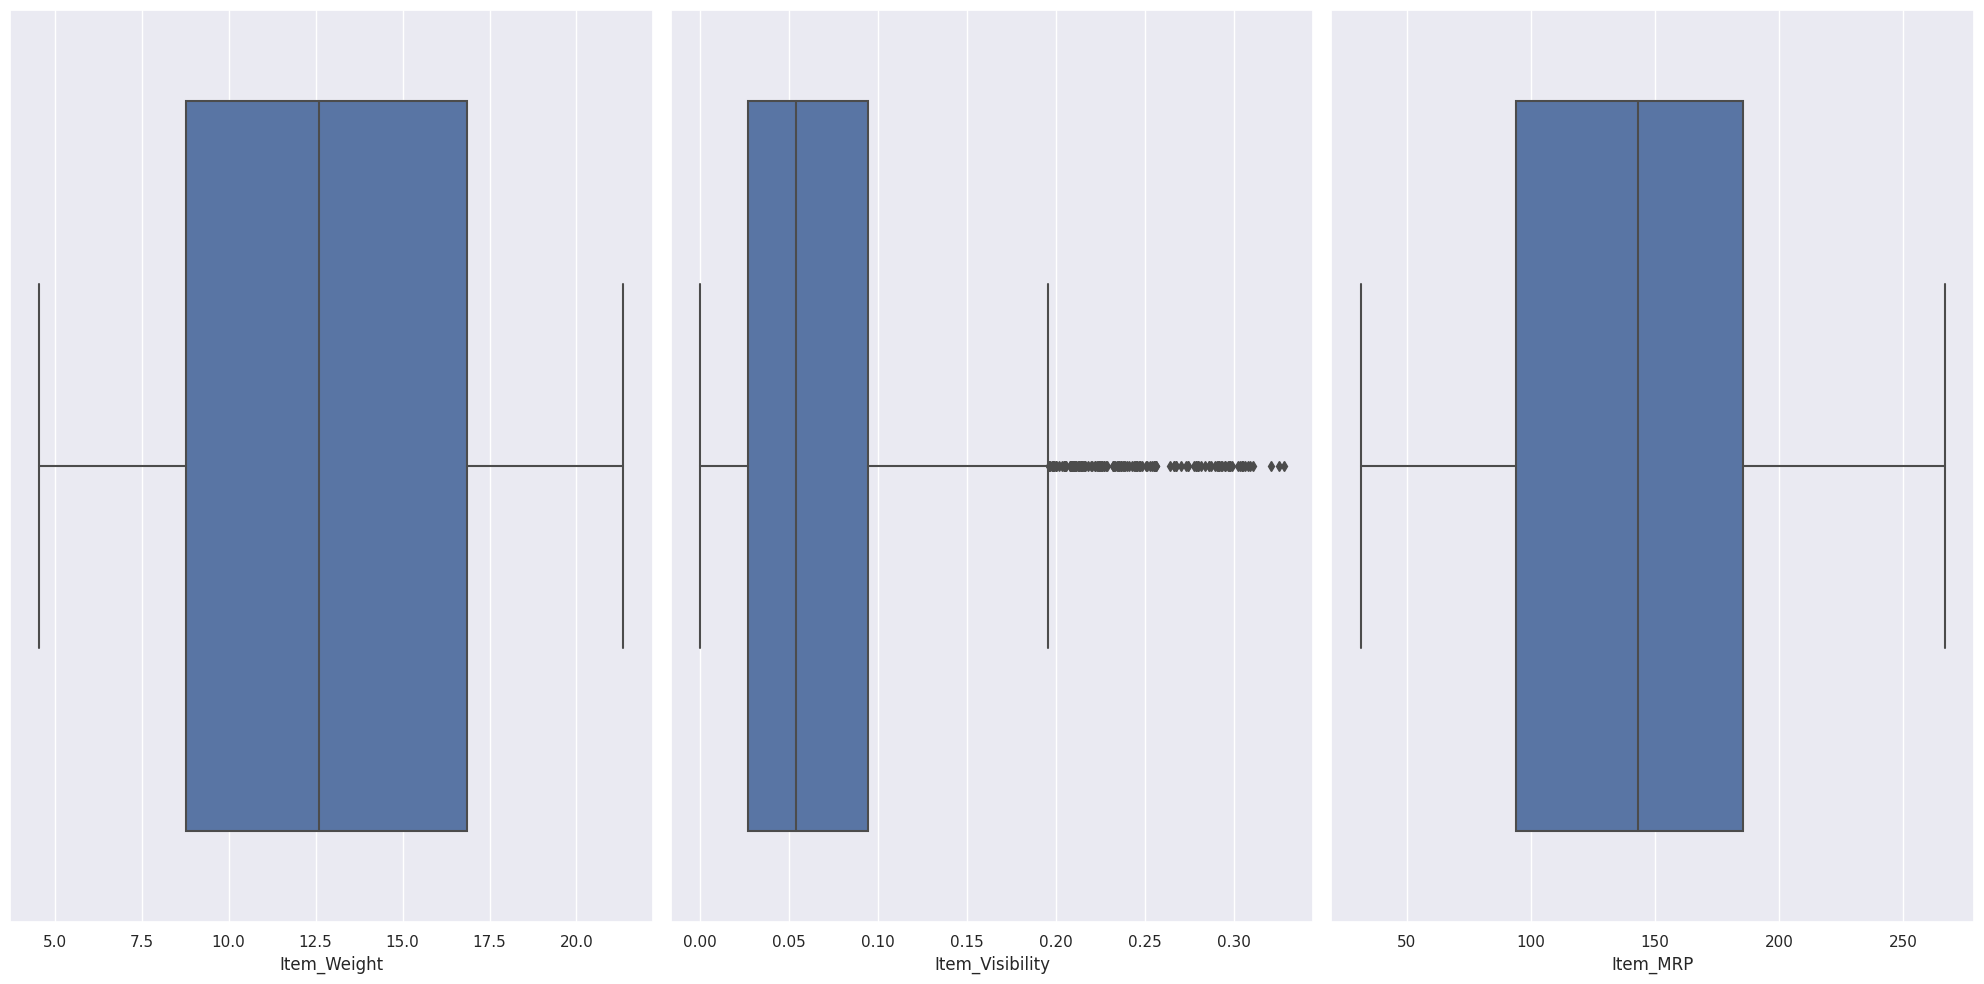

In [8]:
num_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP']
fig,axs= plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs=axs.flatten()
for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data=df, ax=axs[i])
fig.tight_layout()
plt.show()

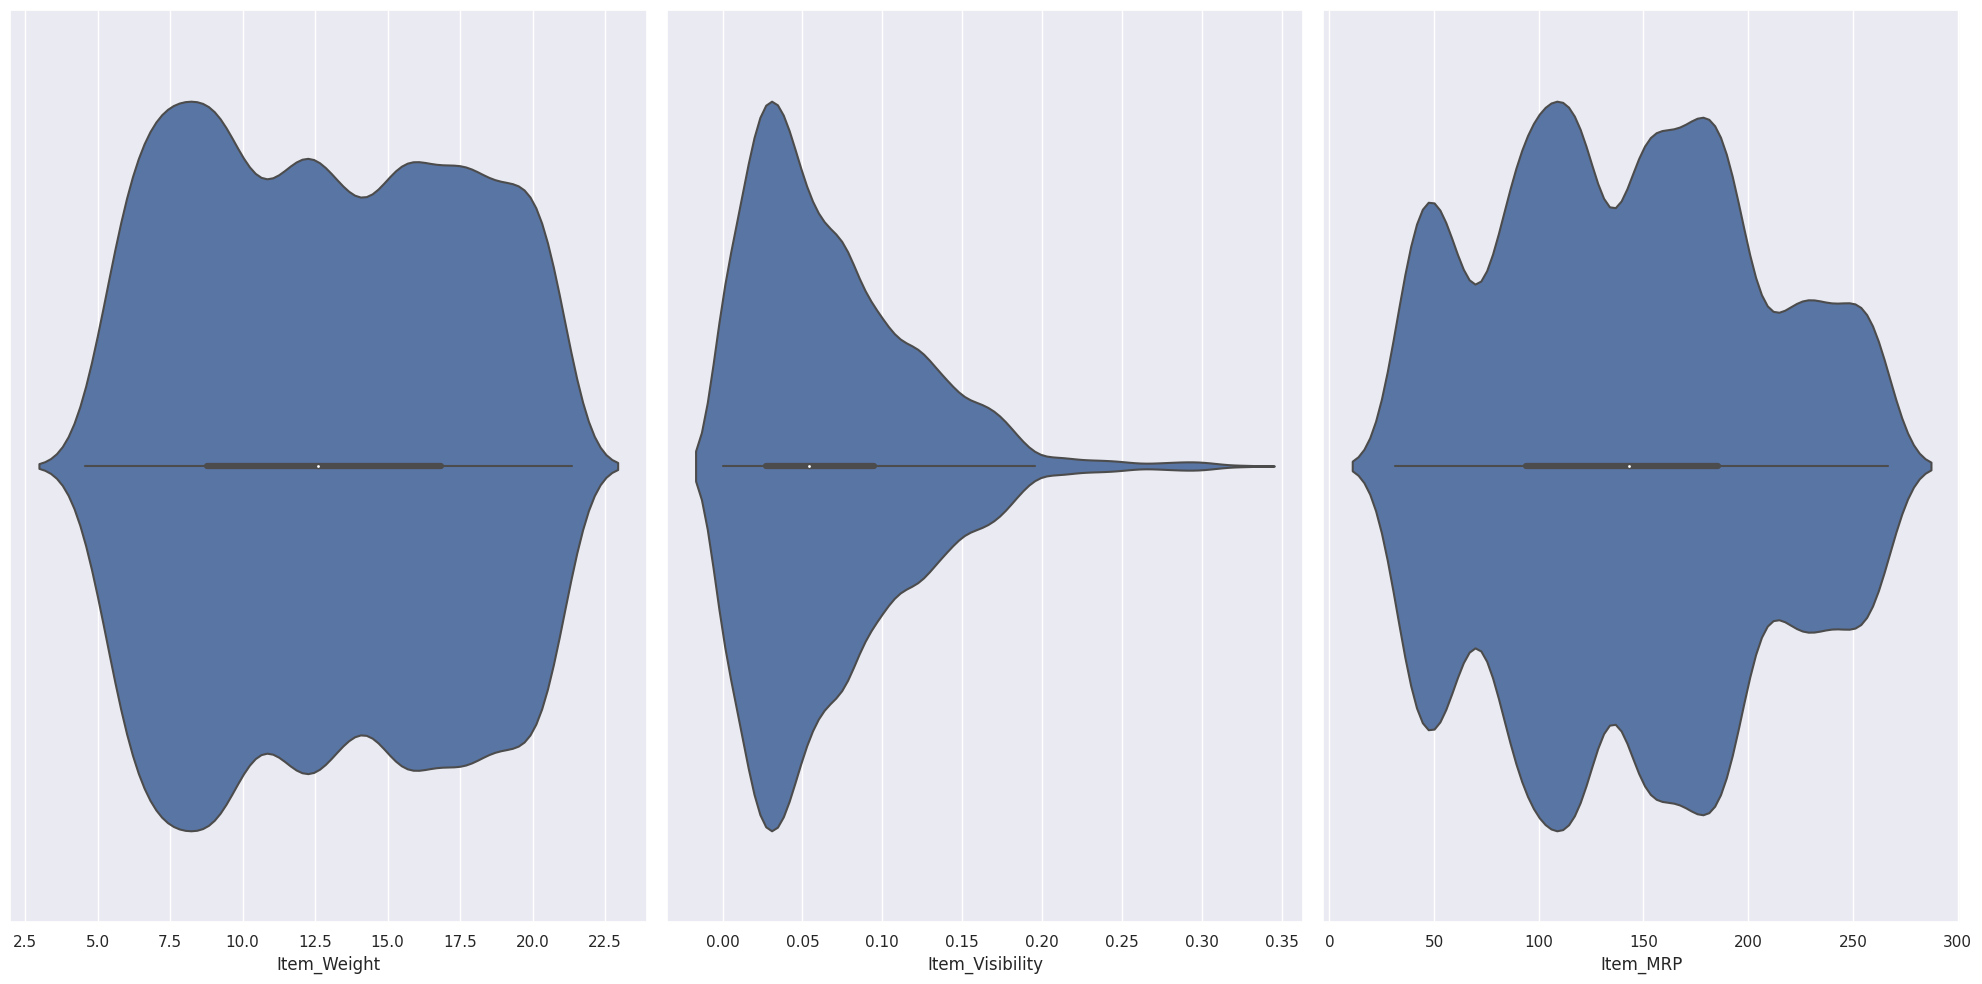

In [9]:
num_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP']
fig,axs= plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()
 
for i, var in enumerate(num_vars):
  sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()



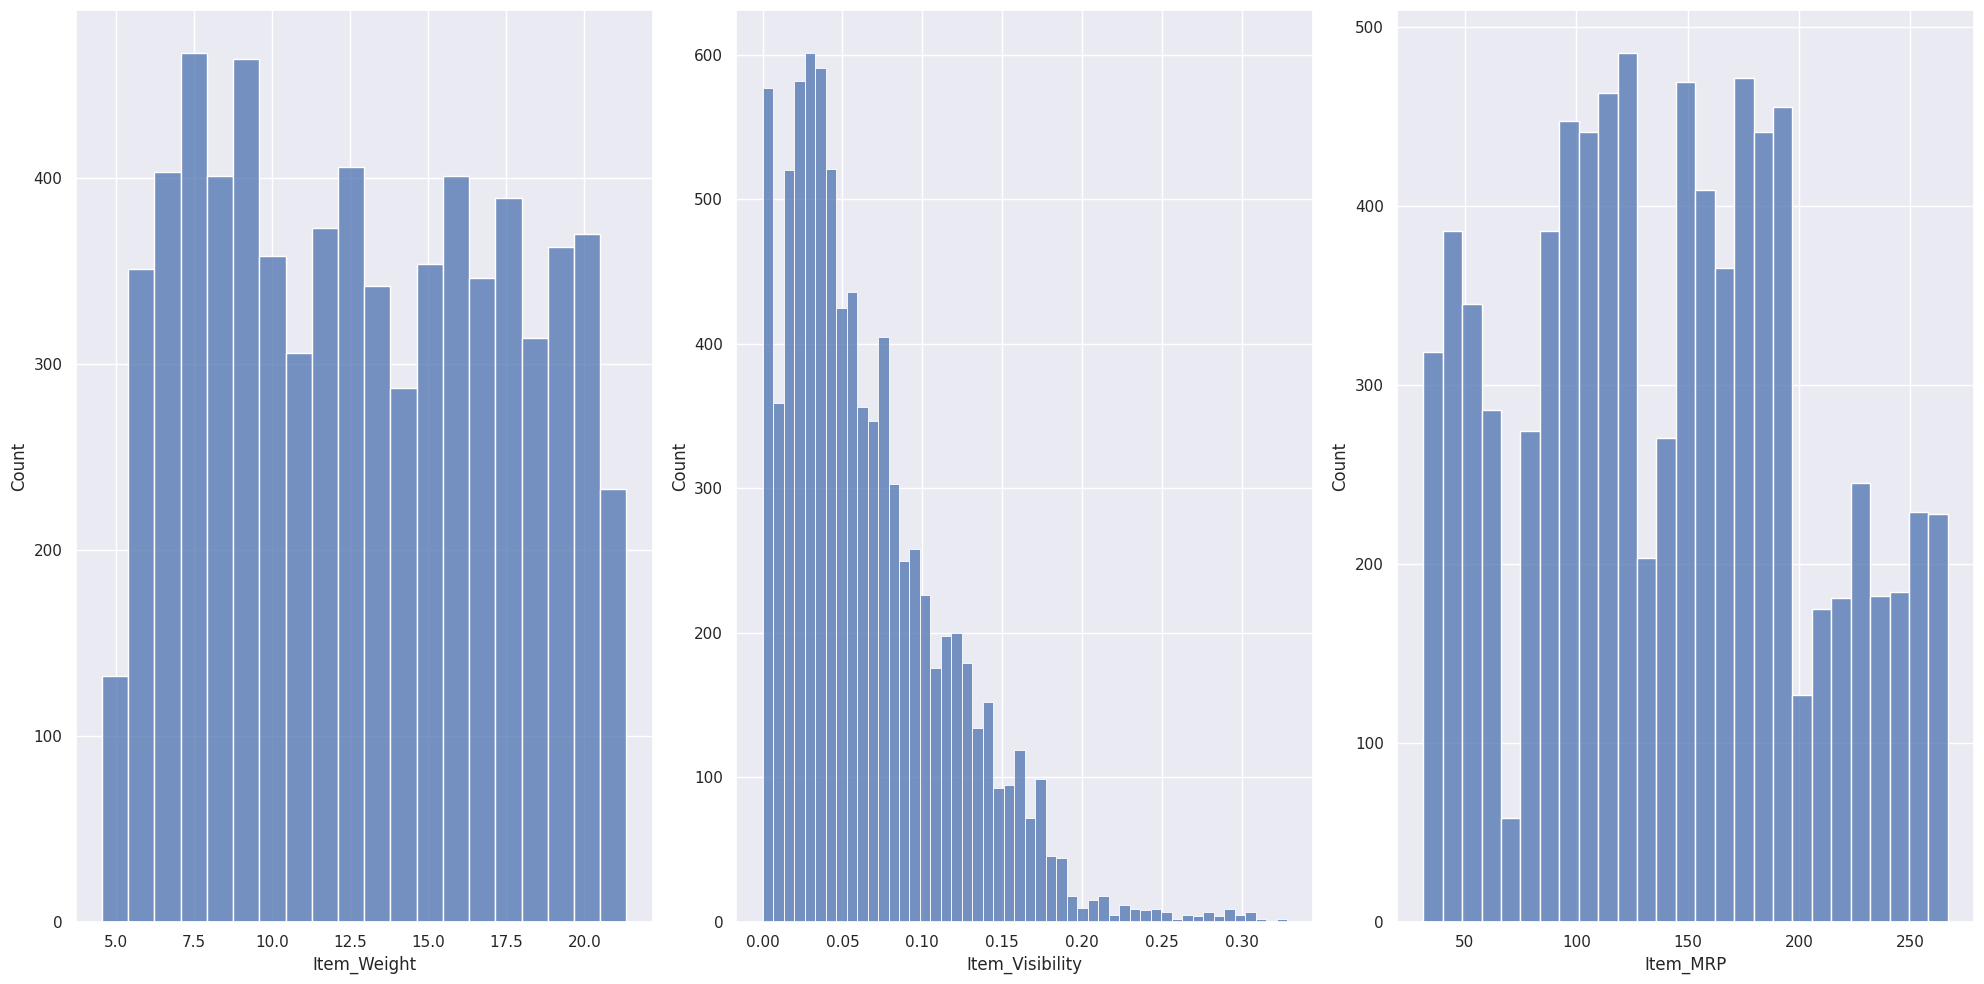

In [10]:
num_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP']
fig,axs= plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

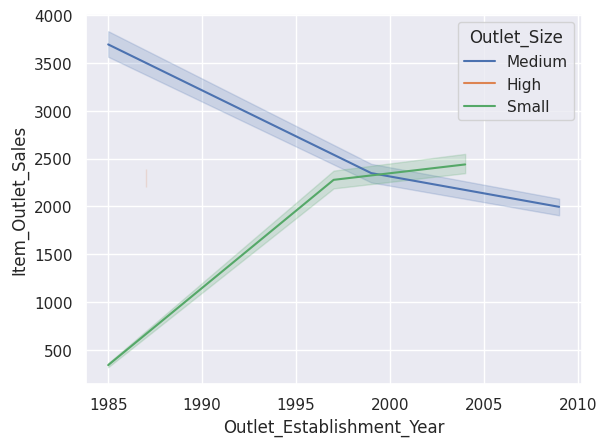

In [11]:
sns.lineplot(data=df, x ='Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue='Outlet_Size')


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

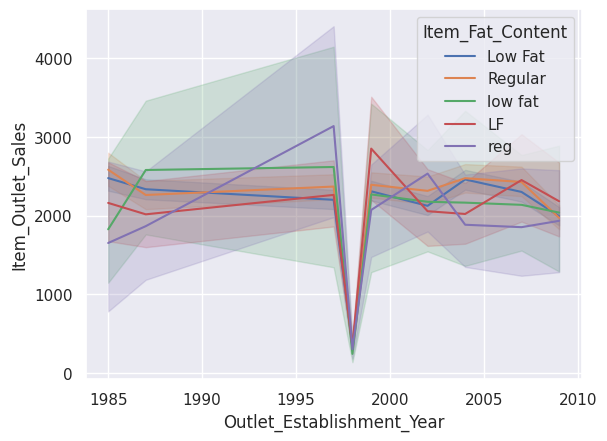

In [12]:
sns.lineplot(data=df, x ='Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue='Item_Fat_Content')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

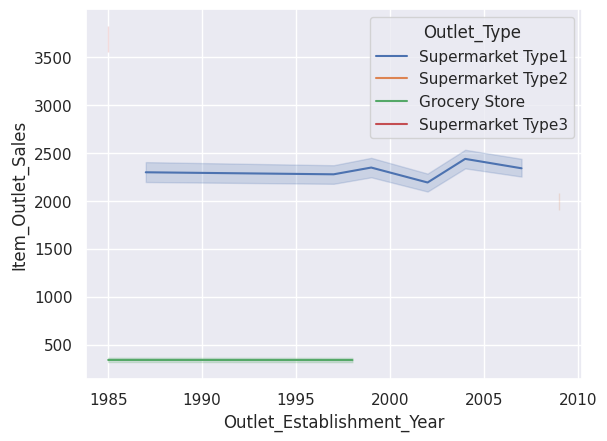

In [13]:
sns.lineplot(data=df, x ='Outlet_Establishment_Year', y ='Item_Outlet_Sales', hue='Outlet_Type')

#**Data** **processing** 

In [14]:
# check the missing values
check_missing=df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Outlet_Size    28.276428
Item_Weight    17.165317
dtype: float64

In [16]:
df.shape

(8523, 11)

In [18]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [19]:
unique_sizes_train3 = df.groupby('Outlet_Type')['Outlet_Size'].unique()
unique_sizes_train3

Outlet_Type
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: Outlet_Size, dtype: object

In [20]:
df.loc[(df['Outlet_Type']== 'Grocery Store') & (df['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

In [21]:
check_missing=df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Outlet_Size    21.764637
dtype: float64

In [23]:
df.dropna(subset=['Outlet_Size'], inplace=True)
df.shape

(6668, 11)

In [24]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
for col in df.select_dtypes(include=['object']).columns:
  print(f'{col}:{df[col].unique(  )}')

Item_Fat_Content:['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type:['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Breakfast' 'Health and Hygiene'
 'Hard Drinks' 'Frozen Foods' 'Canned' 'Starchy Foods' 'Others' 'Breads'
 'Seafood']
Outlet_Identifier:['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT046' 'OUT035' 'OUT019']
Outlet_Size:['Medium' 'Small' 'High']
Outlet_Location_Type:['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type:['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
